In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [4]:
sat = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\satellite-unsupervised-ad.csv", header = None)

In [5]:
sat

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,46.0,40.0,119.0,139.0,42.0,30.0,135.0,157.0,42.0,30.0,...,113.0,50.0,46.0,111.0,116.0,44.0,31.0,131.0,142.0,o
1,47.0,37.0,119.0,133.0,44.0,34.0,124.0,143.0,44.0,34.0,...,85.0,50.0,39.0,118.0,132.0,43.0,29.0,133.0,143.0,o
2,80.0,95.0,100.0,74.0,64.0,64.0,104.0,96.0,46.0,36.0,...,81.0,82.0,91.0,92.0,78.0,78.0,83.0,96.0,74.0,o
3,56.0,51.0,72.0,60.0,59.0,54.0,72.0,60.0,59.0,51.0,...,50.0,57.0,55.0,74.0,61.0,57.0,55.0,78.0,65.0,o
4,44.0,34.0,129.0,140.0,44.0,34.0,124.0,136.0,44.0,34.0,...,139.0,43.0,31.0,128.0,135.0,43.0,29.0,128.0,132.0,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,60.0,83.0,100.0,81.0,60.0,83.0,96.0,85.0,64.0,87.0,...,85.0,66.0,91.0,104.0,92.0,66.0,87.0,108.0,89.0,n
5096,64.0,83.0,104.0,88.0,64.0,79.0,100.0,85.0,56.0,71.0,...,85.0,63.0,83.0,100.0,85.0,66.0,83.0,100.0,85.0,n
5097,68.0,75.0,108.0,96.0,71.0,87.0,108.0,88.0,71.0,91.0,...,89.0,63.0,87.0,104.0,89.0,70.0,100.0,104.0,85.0,n
5098,71.0,87.0,108.0,88.0,71.0,91.0,100.0,81.0,76.0,95.0,...,89.0,70.0,100.0,104.0,85.0,70.0,91.0,104.0,85.0,n


In [6]:
shuffled_df = sat.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92.0,115.0,120.0,94.0,88.0,106.0,111.0,87.0,84.0,94.0,...,75.0,79.0,95.0,100.0,79.0,84.0,95.0,100.0,79.0,n
1,64.0,89.0,102.0,79.0,64.0,81.0,86.0,72.0,68.0,81.0,...,75.0,71.0,83.0,93.0,71.0,71.0,79.0,93.0,71.0,n
2,78.0,87.0,88.0,74.0,70.0,79.0,80.0,66.0,66.0,75.0,...,73.0,78.0,92.0,93.0,73.0,70.0,84.0,85.0,62.0,n
3,86.0,109.0,104.0,85.0,82.0,100.0,104.0,81.0,82.0,100.0,...,94.0,93.0,106.0,114.0,90.0,89.0,106.0,101.0,80.0,n
4,67.0,99.0,109.0,92.0,67.0,87.0,100.0,83.0,63.0,79.0,...,79.0,63.0,81.0,101.0,86.0,71.0,95.0,119.0,94.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,67.0,75.0,78.0,58.0,67.0,71.0,78.0,58.0,67.0,71.0,...,63.0,68.0,79.0,83.0,63.0,68.0,79.0,79.0,67.0,n
5096,50.0,75.0,96.0,78.0,46.0,71.0,87.0,74.0,50.0,71.0,...,89.0,52.0,87.0,104.0,85.0,52.0,83.0,100.0,85.0,n
5097,63.0,106.0,114.0,90.0,60.0,92.0,105.0,87.0,53.0,84.0,...,88.0,68.0,99.0,108.0,85.0,56.0,91.0,104.0,88.0,n
5098,75.0,83.0,85.0,67.0,75.0,83.0,89.0,71.0,75.0,79.0,...,68.0,67.0,73.0,75.0,60.0,63.0,66.0,72.0,57.0,n


In [7]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.592249,1.460448,1.308877,1.048891,1.277903,0.921169,0.747057,0.547100,0.972428,0.195292,...,-0.206415,-0.341540,0.542513,0.239541,0.050371,-0.045160,0.994194,0.260263,0.064637,-0.035966
1,-0.765660,-0.160778,0.155759,-0.061208,-0.761012,-0.658955,-0.857150,-0.568478,-0.393347,-0.613695,...,-0.206415,-0.341540,-0.134632,-0.514493,-0.394515,-0.632324,-0.115936,-0.744775,-0.380923,-0.619666
2,0.413295,-0.285487,-0.741111,-0.431241,-0.251283,-0.785365,-1.242159,-1.014709,-0.564068,-0.987073,...,-0.651699,-0.487010,0.457870,0.051033,-0.394515,-0.485533,-0.201330,-0.430701,-0.890135,-1.276328
3,1.086983,1.086319,0.283883,0.382832,0.768174,0.541939,0.297879,0.100869,0.801707,0.568670,...,1.256662,1.040423,1.727516,0.930739,0.940143,0.762191,1.421167,0.951227,0.128289,0.036996
4,-0.513027,0.462771,0.604194,0.900878,-0.506147,-0.279725,0.041206,0.249612,-0.820151,-0.738154,...,-0.588087,-0.050601,-0.811777,-0.640165,0.113926,0.468609,-0.115936,0.260263,1.274016,1.058471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,-0.513027,-1.033746,-1.381732,-1.615346,-0.506147,-1.291005,-1.370496,-1.609683,-0.478707,-1.235992,...,-1.287819,-1.214360,-0.388562,-0.765837,-1.030067,-1.219488,-0.372120,-0.744775,-1.272044,-0.911516
5096,-1.944615,-1.033746,-0.228614,-0.135214,-2.290198,-1.291005,-0.792981,-0.419734,-1.929843,-1.235992,...,0.811378,0.676749,-1.742852,-0.263148,0.304591,0.395213,-1.738433,-0.493516,0.064637,0.401809
5097,-0.849871,0.899255,0.924505,0.752864,-1.100831,0.036299,0.362047,0.547100,-1.673761,-0.427006,...,0.874990,0.604014,-0.388562,0.490886,0.558812,0.395213,-1.396855,0.009003,0.319243,0.620696
5098,0.160661,-0.534907,-0.933297,-0.949287,0.173491,-0.532545,-0.664645,-0.642850,0.204180,-0.738154,...,-0.588087,-0.850685,-0.473205,-1.142854,-1.538508,-1.439674,-0.799093,-1.561369,-1.717604,-1.641140


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

6


In [14]:
pca = PCA(n_components=6)
new_df = pca.fit_transform(df)

In [15]:
new_df

array([[-1.84540103, -2.20991403,  1.56681656,  0.50473498,  0.97203533,
        -0.22364996],
       [ 2.56682286, -0.20850909, -0.41694087, -0.02643087,  0.38777359,
         0.19938726],
       [ 3.36245139, -1.52018362, -0.89544018, -0.46704588,  1.53813747,
        -0.0337492 ],
       ...,
       [-1.70059557,  3.60656557, -0.26814706, -0.93129739,  1.4791123 ,
         0.53169151],
       [ 4.28213508, -1.71450076,  1.25381365,  0.29014389,  0.54444014,
         0.32079474],
       [ 8.14925497, -1.38192829,  0.14628674, -0.58324133, -0.05071959,
        -0.18334018]])

In [16]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5
0,-1.845401,-2.209914,1.566817,0.504735,0.972035,-0.223650
1,2.566823,-0.208509,-0.416941,-0.026431,0.387774,0.199387
2,3.362451,-1.520184,-0.895440,-0.467046,1.538137,-0.033749
3,-4.173487,-2.677517,-1.264394,0.184443,1.375361,0.127463
4,-0.454984,2.597001,0.244983,0.797260,-1.158134,-0.611195
...,...,...,...,...,...,...
5095,6.321190,-1.089370,-0.560128,-0.544446,-0.283940,-0.066662
5096,3.197948,5.122547,-1.876308,-0.605339,0.692149,-0.349456
5097,-1.700596,3.606566,-0.268147,-0.931297,1.479112,0.531692
5098,4.282135,-1.714501,1.253814,0.290144,0.544440,0.320795


Base Case of Algorithms

In [17]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [18]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [19]:
y

,36
0,0
1,0
2,0
3,0
4,0
...,...
5095,0
5096,0
5097,0
5098,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

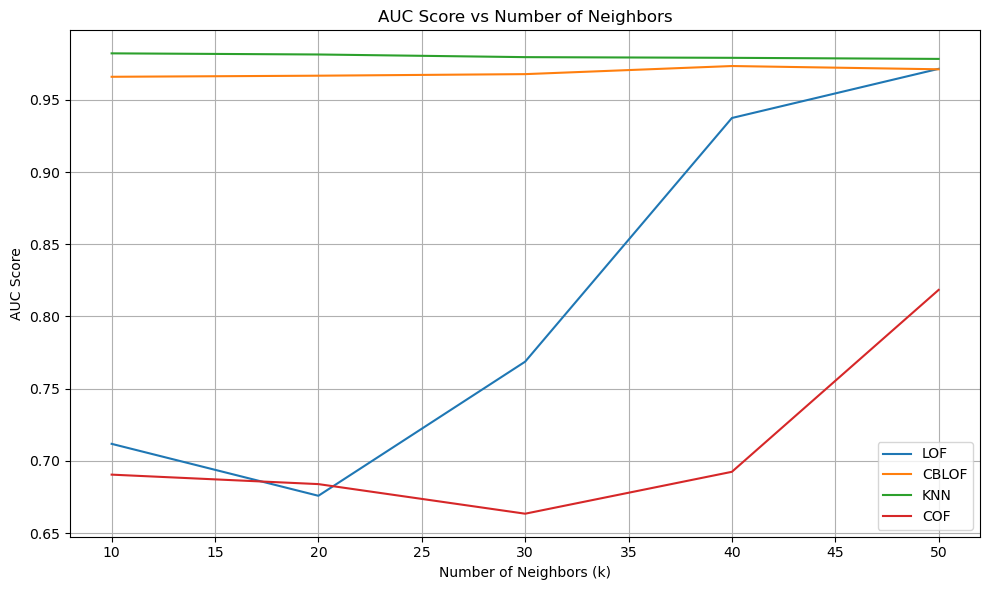

In [20]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []
accuracy_scores_cof = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    cof_pred = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)

    auc_scores_cof.append(auc_cof)
    accuracy_cof = accuracy_score(y, cof_pred)
    accuracy_scores_cof.append(accuracy_cof)


    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)
mean_acc_cof = np.mean(accuracy_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)

print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)
print("COF acc",mean_acc_cof)



KNN auc 0.9800878275290215
LOF auc 0.8130287230514096
CBLOF auc 0.9689812271973466
COF auc 0.7097281592039801
KNN acc 0.9129019607843137
LOF acc 0.9038039215686275
CBLOF acc 0.9114901960784314
COF acc 0.9008235294117647
